# Risk management - Problem set 03
Authors: </br>
- Julia Zezula </br>
- Dawid Włosek </br>

## Problem 1

## Problem 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
def log_likelihood_lognormal(params, lognorm_data):
    scale, sigma_lognorm = params
    n = len(lognorm_data)

    ll = -n * np.log(sigma_lognorm) - n/2 * np.log(2 * np.pi) - np.sum(np.log(lognorm_data)) - \
         np.sum((np.log(lognorm_data / scale) ** 2) / (2 * sigma_lognorm ** 2))

    return -ll  # Return negative log-likelihood for minimization

In [5]:
def lognormal_mle():
    print("MLE - Lognormal Distribution")


    true_scale = 2.0
    true_sigma_lognorm = 0.5
    n_samples = 1000
    np.random.seed(42)
    lognorm_data = np.random.lognormal(mean=np.log(true_scale), sigma=true_sigma_lognorm, size=n_samples)

    initial_guess = [1.0, 1.0]  # [scale, sigma]
    mle_result = optimize.minimize(log_likelihood_lognormal, initial_guess,
                                   args=(lognorm_data,), method='Nelder-Mead')

    scale_mle, sigma_lognorm_mle = mle_result.x

    print("true params:")
    print(f"scale = {true_scale} sigma = {true_sigma_lognorm}")
    print("MLE estimates:")
    print(f"scale = {scale_mle:.4f} sigma = {sigma_lognorm_mle:.4f}")

    return lognorm_data, scale_mle, sigma_lognorm_mle

In [ ]:
def linear_regression():
    print("\nLinear Regression vs Least Squares")
   
    np.random.seed(42)
    n_samples = 100
    true_slope = 2.0
    true_intercept = 1.0
    sigma_noise_true = 0.5

    x_reg = np.linspace(0, 10, n_samples)
    noise = np.random.normal(0, sigma_noise_true, n_samples)
    y_reg = true_slope * x_reg + true_intercept + noise

    X_design = np.vstack([x_reg, np.ones(len(x_reg))]).T
    slope_ls, intercept_ls = np.linalg.lstsq(X_design, y_reg, rcond=None)[0]

    def neg_log_likelihood_regression(params, x, y):
        slope, intercept, sigma_noise = params
        y_pred = slope * x + intercept
        return n_samples / 2 * np.log(2 * np.pi * sigma_noise ** 2) + \
               np.sum((y - y_pred) ** 2) / (2 * sigma_noise ** 2)

    mle_result = optimize.minimize(neg_log_likelihood_regression, [1.0, 1.0, 1.0],
                                   args=(x_reg, y_reg), method='Nelder-Mead')
    slope_mle, intercept_mle, sigma_noise_mle = mle_result.x

    print("ture params:")
    print(f"slope = {true_slope} intercept = {true_intercept}")
    print("least squares:")
    print(f"slope = {slope_ls:.4f} intercept = {intercept_ls:.4f}")
    print("mle estimates:")
    print(f"slope = {slope_mle:.4f} intercept = {intercept_mle:.4f}")

    return x_reg, y_reg, slope_ls, intercept_ls, slope_mle, intercept_mle

In [15]:

def plot_results(lognorm_data, scale_mle, sigma_lognorm_mle, x_reg, y_reg, slope_ls, intercept_ls):
    plt.figure(figsize=(12, 5))

    # Lognormal fit
    plt.subplot(121)
    plt.hist(lognorm_data, bins=50, density=True, alpha=0.7, label='Data', color="mediumseagreen")
    x_vals = np.linspace(min(lognorm_data), max(lognorm_data), 1000)
    y_vals = 1 / (x_vals * np.sqrt(2 * np.pi * sigma_lognorm_mle ** 2)) * \
             np.exp(-(np.log(x_vals / scale_mle) ** 2) / (2 * sigma_lognorm_mle ** 2))
    plt.plot(x_vals, y_vals, color='darkorange', label='fitted distribution')
    plt.title('Lognormal Distribution Fit')
    plt.legend()

    # Linear regression fit
    plt.subplot(122)
    plt.scatter(x_reg, y_reg, alpha=0.5, label='data', color='mediumseagreen')
    plt.plot(x_reg, slope_ls * x_reg + intercept_ls, label='Fitted Line (LS)', color="darkorange")
    plt.title('Linear Regression Fit')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
# Run MLE for lognormal
lognorm_data, scale_mle, sigma_lognorm_mle = lognormal_mle()

MLE - Lognormal Distribution
true params:
scale = 2.0 sigma = 0.5
MLE estimates:
scale = 2.0194 sigma = 0.4894


In [20]:
# Run regression
x_reg, y_reg, slope_ls, intercept_ls, slope_mle, intercept_mle = linear_regression()



Linear Regression vs Least Squares
ture params:
slope = 2.0 intercept = 1.0
least squares:
slope = 2.0069 intercept = 0.9136
mle estimates:
slope = 2.0069 intercept = 0.9136


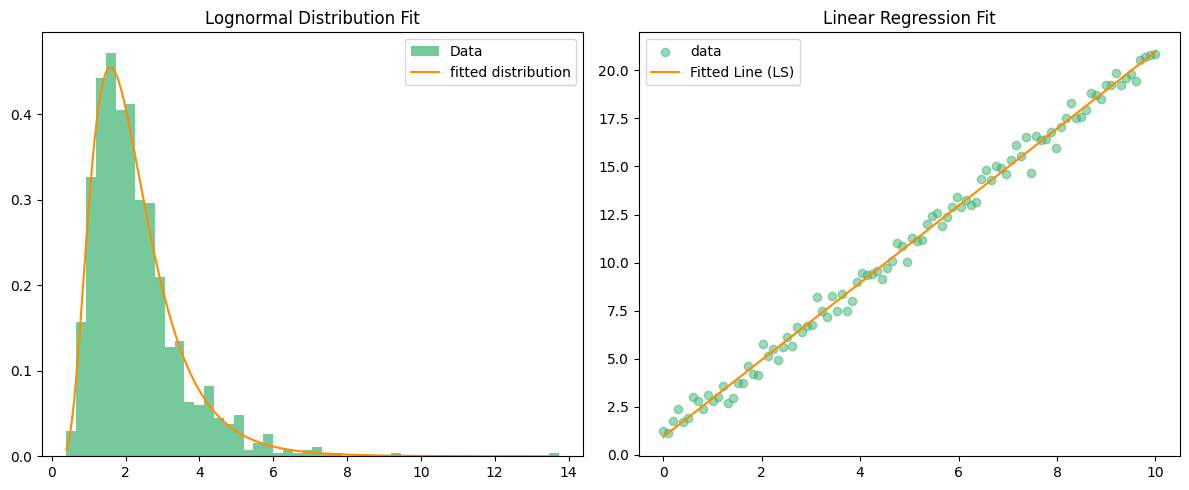

In [16]:
# Plot results
plot_results(lognorm_data, scale_mle, sigma_lognorm_mle, x_reg, y_reg, slope_ls, intercept_ls)

## Problem 3